## Project Report

### Introduction

Cardiovascular disease (also commonly known as heart disease) is a general category of diseases that affect the circulatory system of an individual, including the heart, the blood vessels or both. While the most prevalent type of cardiovascular diseases is the coronary heart disease, there are a lot of other types of cardiovascular diseases that still affect individuals, such as aortic diseases.  These disease might be present in a person due to multiple circumstances, those of which may vary from environmental influences, genetical factors, to lifestyle choices. These variables are likely to play a part in predicting whether an individual is susceptible to a cardiovascular disease.

For instance, according to Centers for Disease and Control Prevention, people who suffer from diabetes (a health condition that affects how energy is processed from food intake indicated by fasting sugar level in the blood) is more likely to experience a cardiovascular disease due to the symptoms present from diabetes, particularly to the high blood pressure present in most diabetes positive people. According to a study from Biomed Central, 32% of individuals suffering from diabetes are affected by cardiovascular diseases, indicating that within diabetic people, cardiovascular diseases are statistically influential on the mortality rates. This in turn, suggests that fasting sugar level, which is correlated to diabetes, is also corellated to the possible presence of a cardiovascular disease, making it a variable that should be considered when predicting cardiovascular diseases within individuals. 

In this project, our group aims to be able to predict the presence of a cardiovascular disease based on variables reported by individuals. These reports are provided by the dataset taken from the UCI Machine Learning Repository (UCI). This particular dataset is a compilation of databases regarding variables within an individual and their diagnoses of a cardiovascular disease from four sources. These four sources are:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

We have chosen to utilize the dataset from the V.A. Medical Center, Long Beach and Cleveland Clinic Foundation.

https://archive.ics.uci.edu/ml/datasets/heart+disease

The variables in the dataset are as follows:
- Age : age in years
- Sex : (1 = male; 0 = female)
- cp : Chest pain type; (chest pain type 1 = typical angina, 2 = atypical angina, 3 = non-angina pain, 4 = asymptomatic angina)
- trestbps : Resting blood pressure (in mm Hg on admission to the hospital)
- chol : Serum cholesterol (in mg/dl)
- fbs : Fasting blood sugar; Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg : Resting electrocardiographic results
- thalach : Maximum heart rate achieved
- exang : Exercise induced angina (1 = yes; 0 = no)
- oldpeak : ST depression induced by exercise relative to rest
- slope : The slope of the peak exercise ST segment
- ca : Number of major vessels (0-3) colored by fluoroscopy
- thal : (3 = normal; 6 = fixed defect; 7 = reversable defect)
- num : Diagnosis of heart disease (angiographic disease status)

In our research, we will be using five of the variables from the dataset, those of which are the following:
- Age : measured in years
- cp : (1= typical angina; 2= atypical angina; 3= non-angina pain; 4= asymptomatic angina)
- chol : measured in mg/dl
- fbs : measured in fbs > 120 mg/dl (1= true; 0= false)
- thalach : measured in beats per minute (BPM)

We will be making use of the classification method in order to conduct this research. We will be loading the dataset in, and then build a training and testing model that will be utilized in order to predict the presence of a cardiovascular disease. We will also be using cross-validation to find the k-nearest neighbors (KNN).

In [7]:
# Packages needed for classification on our dataset
import altair as alt
import numpy as np
import pandas as pd
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

alt.data_transformers.disable_max_rows()
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

### Preliminary Exploratory Data Analysis

Below, we load the dataset into Jupyter:

In [8]:
# Loading the dataset using the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

heart_disease = pd.read_csv(url, header=None)

heart_disease.columns = ("Age",
           "Sex",
           "Chest_Pain_Type",
           "Resting_Blood_Pressure",
           "Serum_Cholesterol",
           "Fasting_Blood_Sugar",
           "Resting_ECG",
           "Max_Heart_Rate",
           "Exercise_Induced_Angina",
           "ST_Depression_Exercise",
           "Peak_Exercise_ST_Segment",
           "Num_Major_Vessels_Flouro",
           "Thalassemia",
           "Diagnosis") # assigning human-readable column headings

heart_disease

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression_Exercise,Peak_Exercise_ST_Segment,Num_Major_Vessels_Flouro,Thalassemia,Diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


We filtered the dataset to include only the variables taken into consideration:

In [9]:
# Filtering to include only the columns we will be using in our analysis
heart_disease_final = heart_disease.loc[:, ["Age","Chest_Pain_Type","Fasting_Blood_Sugar", "Serum_Cholesterol", "Max_Heart_Rate", "Diagnosis"]]
heart_disease_final

,Age,Chest_Pain_Type,Fasting_Blood_Sugar,Serum_Cholesterol,Max_Heart_Rate,Diagnosis
0,63.0,1.0,1.0,233.0,150.0,0
1,67.0,4.0,0.0,286.0,108.0,2
2,67.0,4.0,0.0,229.0,129.0,1
3,37.0,3.0,0.0,250.0,187.0,0
4,41.0,2.0,0.0,204.0,172.0,0
...,...,...,...,...,...,...
298,45.0,1.0,0.0,264.0,132.0,1
299,68.0,4.0,1.0,193.0,141.0,2
300,57.0,4.0,0.0,131.0,115.0,3
301,57.0,2.0,0.0,236.0,174.0,1


Since our data is in a tidy format (each column is a single variable, each row is a single observation and each cell is a single value), we only need to drop all rows containing Na's and change the data types of certain columns. This is in order to wrangle the dataset for ease of work:

In [10]:
heart_disease_final.dropna() # Removing Na's


# Age is measured in years therefore will be an integer
heart_disease_final.Age = heart_disease.Age.astype('int64') 

# A patient either has heart disease or not, hence diagnosis will be of bool type
heart_disease_final.Diagnosis = heart_disease.Diagnosis.astype(bool) 

# Since chest pain type can only be one of 1, 2, 3, 4 hence it will be of type int64
heart_disease_final.Chest_Pain_Type = heart_disease.Chest_Pain_Type.astype('int64') 

# Since maximum heart rate is measured in Beats per Minute, its type should be changed to int64
heart_disease_final.Max_Heart_Rate = heart_disease.Max_Heart_Rate.astype('int64') 


heart_disease_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  303 non-null    int64  
 1   Chest_Pain_Type      303 non-null    int64  
 2   Fasting_Blood_Sugar  303 non-null    float64
 3   Serum_Cholesterol    303 non-null    float64
 4   Max_Heart_Rate       303 non-null    int64  
 5   Diagnosis            303 non-null    bool   
dtypes: bool(1), float64(2), int64(3)
memory usage: 12.3 KB


In [11]:
heart_disease_final # The final tidy data

,Age,Chest_Pain_Type,Fasting_Blood_Sugar,Serum_Cholesterol,Max_Heart_Rate,Diagnosis
0,63,1,1.0,233.0,150,False
1,67,4,0.0,286.0,108,True
2,67,4,0.0,229.0,129,True
3,37,3,0.0,250.0,187,False
4,41,2,0.0,204.0,172,False
...,...,...,...,...,...,...
298,45,1,0.0,264.0,132,True
299,68,4,1.0,193.0,141,True
300,57,4,0.0,131.0,115,True
301,57,2,0.0,236.0,174,True


### Summary

We start by showing the mean of each variable grouped by diagnosis:

In [12]:
diagnosis_mean = heart_train.groupby("Diagnosis").agg("mean")
diagnosis_mean_filtered = diagnosis_mean.loc[:,["Age","Fasting_Blood_Sugar","Serum_Cholesterol","Max_Heart_Rate"]]
diagnosis_mean_filtered

NameError: name 'heart_train' is not defined

We then created a dataframe grouped by chest pain type to see the summarized count of each variable for each chest pain type:

In [8]:
# Grouping by Chest_Pain_Type to see count of each variable for every chest pain type
chest_pain_grouped = heart_train.groupby("Chest_Pain_Type").agg("count")
chest_pain_grouped

,Age,Fasting_Blood_Sugar,Serum_Cholesterol,Max_Heart_Rate,Diagnosis
Chest_Pain_Type,,,,,
1,16,16,16,16,16
2,35,35,35,35,35
3,72,72,72,72,72
4,104,104,104,104,104


Next, we visualize the data into plots and graphs in order to display data effectively.
We visualize how maximum heart rate changes with age through a scatter plot:

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


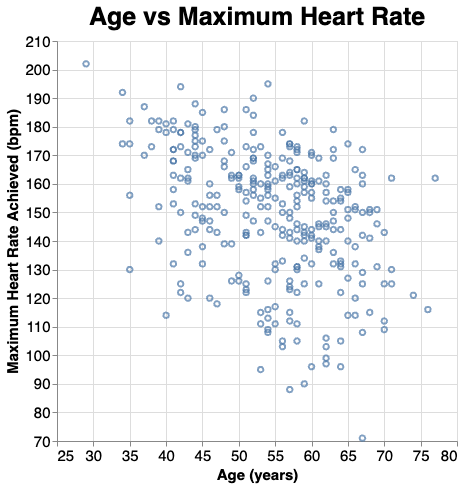

In [9]:
age_vs_thalach = (
    alt.Chart(heart_disease_final, title="Age vs Maximum Heart Rate")
    .mark_point()
    .encode(
        x=alt.X("Age", title="Age (years)",scale=alt.Scale(zero=False)),
        y=alt.Y(
            "Max_Heart_Rate:Q",
            title="Maximum Heart Rate Achieved (bpm)",
            scale=alt.Scale(zero=False)
        ),
    )
    .configure_axis(labelFontSize=15, titleFontSize=15)
    .configure_title(fontSize=25)
    .properties(width=400, height=400)
)
age_vs_thalach

Next, we visualize a bar graph that displays the distribution of diagnosis for each chest pain type:

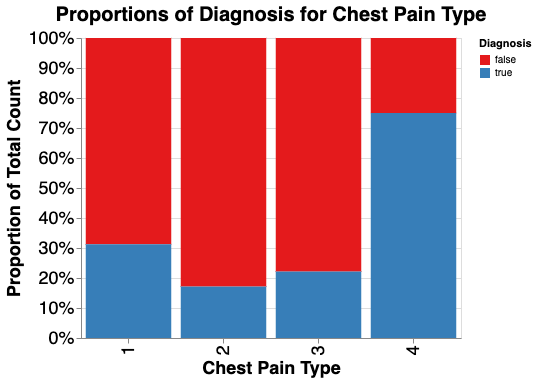

In [10]:
diagnosis_dist_plot = (
    alt.Chart(heart_train, title="Proportions of Diagnosis for Chest Pain Type" )
    .mark_bar()
    .encode(
        y=alt.Y(
            "count(Chest_Pain_Type):Q",
            stack="normalize",
            axis=alt.Axis(format="%"),
            title="Proportion of Total Count",
        ),
        x=alt.X("Chest_Pain_Type:N", title= "Chest Pain Type"),
        fill=alt.Fill(
            "Diagnosis", scale=alt.Scale(scheme="set1")
        ),  # N is to specify this is a categorical variable
    )
    .properties(width=380, height=300)
    .configure_axis(labelFontSize=18, titleFontSize=18)
    .configure_title(fontSize=20)
)
diagnosis_dist_plot

## Data Analysis

From the given dataset, we selected 5 variables as our predictors in order to prevent redundancy or irrelevance. Adding variables that have with weaker correlations leads to overfitting because it would lead to more noise within our model.

The variables we have selected for our model are:
- Age: measured in years
- Chest pain type (cp): 1 = typical angina, 2 = atypical angina, 3 = non-angina pain, 4 = asymptomatic angina
- Serum Cholesterol (chol): measured in mg/dl
- Fasting blood sugar (fbs): measured in mg/dL 
- Maximum heart rate achieved (thalach): measured in beats per min (BPM)

### Splitting the dataset into training and testing data

In [11]:
# We are using 75% of our data as training data and 25% as testing data

# We will set the stratify argument to the categorical label variable to ensure that the training and testing subsets contain the right proportions of each category of observation.
heart_train, heart_test = train_test_split(
    heart_disease_final, train_size=0.75, stratify=heart_disease["Diagnosis"], random_state=2304 
)


print(heart_train.head())
print(heart_test.head())

     Age  Chest_Pain_Type  Fasting_Blood_Sugar  Serum_Cholesterol  \
187   66                2                  0.0              246.0   
98    52                2                  0.0              201.0   
197   45                4                  0.0              236.0   
209   62                4                  0.0              244.0   
291   55                2                  0.0              342.0   

     Max_Heart_Rate  Diagnosis  
187             120       True  
98              158      False  
197             152      False  
209             154       True  
291             166      False  
     Age  Chest_Pain_Type  Fasting_Blood_Sugar  Serum_Cholesterol  \
263   44                3                  0.0              226.0   
240   41                2                  0.0              235.0   
252   64                4                  0.0              263.0   
66    60                3                  0.0              185.0   
9     53                4                 

## KNN Classification

We first start by doing some preprocessing to standardize our variables. We pass the training data into the preprocessor to compute the preprocessing steps. This is to ensure that our test data does not influence our model in any way.

In [12]:
# We apply the standardization steps to the numeric predictor variables only
heart_preprocessor = make_column_transformer(
    (
        "passthrough",
        [
            "Chest_Pain_Type",
            "Fasting_Blood_Sugar",
        ],
    ),
    (StandardScaler(), ["Age", "Serum_Cholesterol", "Max_Heart_Rate"]),
)

heart_preprocessor

ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                 ['Chest_Pain_Type', 'Fasting_Blood_Sugar']),
                                ('standardscaler', StandardScaler(),
                                 ['Age', 'Serum_Cholesterol',
                                  'Max_Heart_Rate'])])

### Cross-validation: Deciding which value of K to use

First, we create a pipeline which has the number of neighbors left unspecified.

In [13]:
knn = KNeighborsClassifier()

heart_tune_pipe = make_pipeline(heart_preprocessor, knn)


We now construct the parameter_grid dictionary that will tell GridSearchCV what parameter values to try. 

In [14]:
# We specify the range of K values here
param_grid = {
    "kneighborsclassifier__n_neighbors": range(2, 100, 1),
}

Then, we create the GridSearchCV object where we specify the heart_tune_pipe as the estimator argument, param_grid as the param_grid argument and specify cv=10 for 10 fold cross validation. Finally, we use the fit method on the GridSearchCV object to begin the tuning process.

In [15]:
heart_tune_grid = GridSearchCV(
    estimator=heart_tune_pipe,
    param_grid=param_grid,
    cv=10
)

# We pass the training data predictors and labels as the two arguments to fit 
# We will wrap it in a pd.DataFrame to make it easier to understand, and print the info of the result.


X_tune = heart_train.drop(columns=["Diagnosis"])
y_tune = heart_train["Diagnosis"]
# heart_train
knn_model_grid = heart_tune_grid.fit(X_tune, y_tune)
# X_tune

accuracies_grid = pd.DataFrame(knn_model_grid.cv_results_)

accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025630,0.001105,0.023143,0.007429,2,{'kneighborsclassifier__n_neighbors': 2},0.565217,0.608696,0.608696,0.434783,0.739130,0.565217,0.739130,0.636364,0.772727,0.727273,0.639723,0.100079,98
1,0.023102,0.001942,0.018472,0.001294,3,{'kneighborsclassifier__n_neighbors': 3},0.521739,0.739130,0.652174,0.434783,0.739130,0.652174,0.826087,0.727273,0.636364,0.636364,0.656522,0.107514,97
2,0.020520,0.001362,0.016690,0.000763,4,{'kneighborsclassifier__n_neighbors': 4},0.652174,0.695652,0.608696,0.565217,0.739130,0.695652,0.782609,0.636364,0.636364,0.772727,0.678458,0.067773,96
3,0.016748,0.004477,0.013150,0.004407,5,{'kneighborsclassifier__n_neighbors': 5},0.695652,0.869565,0.608696,0.521739,0.782609,0.608696,0.782609,0.772727,0.681818,0.636364,0.696047,0.100191,94
4,0.008000,0.000113,0.006632,0.000266,6,{'kneighborsclassifier__n_neighbors': 6},0.695652,0.782609,0.695652,0.521739,0.739130,0.652174,0.739130,0.727273,0.636364,0.727273,0.691700,0.069883,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.008289,0.000328,0.007094,0.000313,95,{'kneighborsclassifier__n_neighbors': 95},0.782609,0.826087,0.695652,0.478261,0.695652,0.695652,0.782609,0.772727,0.636364,0.772727,0.713834,0.095648,76
94,0.009781,0.000305,0.008451,0.000318,96,{'kneighborsclassifier__n_neighbors': 96},0.782609,0.826087,0.695652,0.478261,0.782609,0.652174,0.782609,0.772727,0.636364,0.772727,0.718182,0.099583,64
95,0.009536,0.000152,0.008168,0.000097,97,{'kneighborsclassifier__n_neighbors': 97},0.782609,0.826087,0.739130,0.478261,0.695652,0.652174,0.782609,0.772727,0.636364,0.772727,0.713834,0.097604,74
96,0.009377,0.000211,0.007990,0.000252,98,{'kneighborsclassifier__n_neighbors': 98},0.782609,0.869565,0.739130,0.521739,0.739130,0.652174,0.826087,0.772727,0.681818,0.772727,0.735771,0.093121,9


Next, we create a line plot that will help us decide which value of k to choose.

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


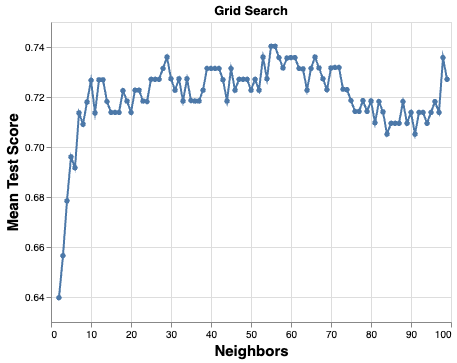

In [16]:
accuracy_versus_k_grid = (
    alt.Chart(accuracies_grid, title="Grid Search")
    .mark_line(point=True)
    .encode(
        x=alt.X(
            "param_kneighborsclassifier__n_neighbors",
            title="Neighbors",
            scale=alt.Scale(zero=False),
        ),
        y=alt.Y(
            "mean_test_score", 
            title="Mean Test Score", 
            scale=alt.Scale(zero=False)
        ),
    )
    .configure_axis(labelFontSize=10, titleFontSize=15)
    .properties(width=400, height=300)
)

accuracy_versus_k_grid

From the graph, we can see that K = 55 and 56 has the greatest accuracy. Therefore, when building our classification model we will pick the value of parameter K to be 55.

### Building our model

Now, we will build our classifier using the training data and K=55.

In [22]:
knn_spec = KNeighborsClassifier(n_neighbors=55)

X = heart_train[["Age","Chest_Pain_Type","Fasting_Blood_Sugar", "Serum_Cholesterol", "Max_Heart_Rate"]]
y = heart_train["Diagnosis"]

heart_fit = make_pipeline(heart_preprocessor, knn_spec).fit(X, y)
heart_fit

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['Chest_Pain_Type',
                                                   'Fasting_Blood_Sugar']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Serum_Cholesterol',
                                                   'Max_Heart_Rate'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=55))])

#### Predicting Diagnosis for the test data

In [23]:
# Passing the fitted model and the test dataset to the predict function
heart_test_predictions = heart_fit.predict(heart_test[["Age","Chest_Pain_Type","Fasting_Blood_Sugar", "Serum_Cholesterol", "Max_Heart_Rate"]])

heart_test_predictions = pd.concat(
    [
        heart_test.reset_index(drop=True),
        pd.DataFrame(heart_test_predictions, columns=["predicted"]),
    ],
    axis=1,
)
heart_test_predictions.head(10)

,Age,Chest_Pain_Type,Fasting_Blood_Sugar,Serum_Cholesterol,Max_Heart_Rate,Diagnosis,predicted
0,44,3,0.0,226.0,169,False,0.0
1,41,2,0.0,235.0,153,False,0.0
2,64,4,0.0,263.0,105,False,1.0
3,60,3,0.0,185.0,155,True,0.0
4,53,4,1.0,203.0,155,True,1.0
5,67,3,0.0,212.0,150,True,1.0
6,41,3,0.0,268.0,172,False,0.0
7,42,3,1.0,240.0,194,False,0.0
8,54,4,0.0,286.0,116,True,1.0
9,56,2,0.0,294.0,153,False,0.0


### Testing the accuracy of our model

Here, we use the score function to get statistics about the quality of our model. We named the predictors as X_test and the target variable as y_test

In [24]:
X_test = heart_test[["Age","Chest_Pain_Type","Fasting_Blood_Sugar", "Serum_Cholesterol", "Max_Heart_Rate"]]
y_test = heart_test["Diagnosis"]

heart_prediction_accuracy = heart_fit.score(X_test, y_test)
heart_prediction_accuracy

0.7763157894736842

### Creating a confusion matrix

We create a confusion matrix to see the table of predicted labels and true labels.

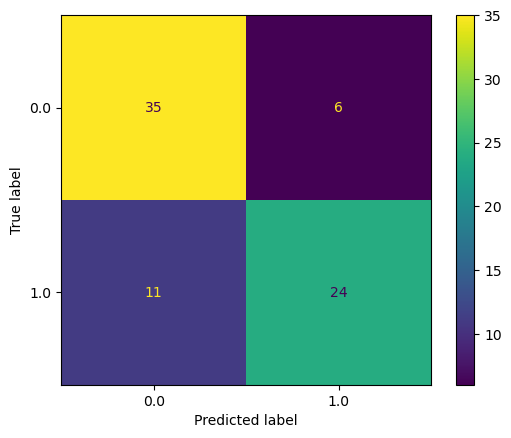

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

heart_mat = confusion_matrix(
    heart_test_predictions["Diagnosis"],  # true labels
    heart_test_predictions["predicted"],  # predicted labels
    labels=heart_fit.classes_, # specify the label for each class
)

disp = ConfusionMatrixDisplay(
    confusion_matrix=heart_mat, display_labels=heart_fit.classes_
)
disp.plot()


We can see from the confusion matrix that there are 11 false negative reports and 6 false positive reports. Also, there were 59 reports that were correctly diagnosed.

### Methods

### Our data analysis procedure

We first started by loading our dataset from the original source on the web using the pandas read_csv function and giving appropriate column headings to each column. Then, we filtered the dataset to include only those variables that we will be using in our classification model which were age, chest pain type, serum cholesterol, fasting blood sugar and maximum heart rate achieved along with the target variable which is Diagnosis.

Next, since our data was already in a tidy format, the only data wrangling and cleaning we had to perform was to drop all columns containing NaN and changing the data types of some columns to make it more appropriate for use in our analysis. The columns whose data types we modified were:
- Age: since age is a whole number measured in years, we changed it to Integer
- Diagnosis: A patient either has heart disease or not, hence diagnosis will be of bool type.
- Chest Pain Type: Since chest pain type can only be one of 1, 2, 3, 4 hence it will be of type int64
- Max Heart Rate: Since maximum heart rate is measured in Beats per Minute, we changed its type to int64

Our next step was to produce summary tables and graphs showing the relationship between different variables in the data which would be useful for exploratory data analysis. We produced a table that showed the mean value of each variable grouped by Diagnosis. Our second summary table showed the count for each variable grouped by chest pain type. We also produced 2 visualizations of the data which included:
- A scatterplot of Max Heart Rate Achieved against Age.
- A histogram showing the proportions of Diagnosis for each Chest Pain Type.

We started building our model by splitting the data set into training and testing data. We decided to use 75% of our data as training data and 25% as testing data. We first started by doing some preprocessing to standardize our variables. This is to ensure that our test data does not influence our model in any way. Then, we performed cross-validation to decide which value of K should be used to build the model.
After perfoming cross-validation, we created a line chart of Mean Test Score against Number of Neighbors to help us decide the best value for the parameter. Looking at the graph, we decided to use K=55 to build our classification model.

Using K=55, we built our classification model by performing knn-classification and added our predictions as a new column to the original dataset. Then, we calculated the accuracy of our model using the score function, which gave us an accuracy of around 77.6%. Additionally, we created a confusion matrix to help us analyse the number of correct and false diagnoses.

By analysing the confusion matrix, we came to the conclusion that 59 out of 76 reports were correctly diagnosed, 11 were false negatives and 6 were false positives.


### Why these variables?

The variables we have chosen to predict heart disease are due to the following reasons:
- Age: According to the National Institute of Aging (2018), aging results in significant changes on the heart and blood vessels (arteries), which will directly impact the risks of a heart disease. 

- Chest pain type (cp): As mentioned by Abdullah et al. (2021), chest pain type is a major symptom which has shown to be highly and sensitively correlated to the results of a positive diagnosis for a heart disease, consequently shown to be a predictive factor of heart diseases.

- Serum cholesterol (chol): The state of hypercholesterolemia (high levels of cholesterol) in patients exhibit higher vulnerability towards heart disease, indicating a correlational as well as a causation effect between the two (Mannu et al., 2013).

- Fasting blood sugar (fbs): Those with higher blood sugar levels symptomatic of those with diabetic mellitus suffer from more severe heart diseases, insinuating an association between blood sugar levels and the presence of heart diseases (Saha et al., 2022)

- Maximum heart rate achieved (thalach): As stated by Christine et al. (2009), "an increase in heart rate by 10 beats per minute [is] associated with an increase in the risk of cardiac death by at least 20%". This indicates that the count of heart rate is notable in regards to risk of heart disease.


### Expected outcomes and significance

We expect that individuals who are older, have higher cholesterol levels, present higher maximum heart rate, experience certain chest pain types, and have higher blood sugar levels are more likely to be suffering from heart disease.

These findings will be able to help indicate and predict the possibility of a heart disease and help people improve their health standards in order to prevent developing heart disease.

This analysis could pose questions in the future such as:
- "What habits in our daily life contribute to the development of heart disease in the future?"
- "What methods could be done to prevent factors of heart disease in the future?"
- "What other possible diseases might be indicated by these vital signs?"
- "How do these factors effect the chances of getting a heart disease?"
- "Why do these factors effect the chances of getting a heart disease?"

### References

U.S. Department of Health and Human Services. (2018). Heart health and aging. National Institute on Aging. Retrieved 2023, from https://www.nia.nih.gov/health/heart-health-and-aging 

Sheik Abdullah, A., Selvakumar, S., Venkatesh, M. (2021). Assessment and evaluation of CHD risk factors using weighted ranked correlation and regression with data classification. _Soft Computing, 25_(6), 4979–5001. https://doi.org/10.1007/s00500-021-05663-y 

S. Mannu, G., J.S. Zaman, M., Gupta, A., U. Rehman, H., K. Myint, P. (2013). Evidence of lifestyle modification in the management of Hypercholesterolemia. _Current Cardiology Reviews, 9_(1), 2–14. https://doi.org/10.2174/157340313805076313 

Saha, A., Kuila, M., & Sharma, R. K. . (2022). Relationship of severity of coronary artery disease with fasting blood sugar and glycosylated hemoglobin. _Asian Journal of Medical Sciences, 13_(3), 38–42. https://doi.org/10.3126/ajms.v13i3.40416

Perret-Guillaume, C., Joly, L., &amp; Benetos, A. (2009). Heart rate as a risk factor for cardiovascular disease. _Progress in Cardiovascular Diseases, 52_(1), 6–10. https://doi.org/10.1016/j.pcad.2009.05.003 

Centers for Disease Control and Prevention. (2022). Diabetes and your heart. Centers for Disease Control and Prevention. Retrieved 2023, from https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html#:~:text=If%20you%20have%20diabetes%2C%20you,are%20to%20have%20heart%20disease

Einarson, T. R., Acs, A., Ludwig, C., &amp; Panton, U. H. (2018). Prevalence of cardiovascular disease in type 2 diabetes: A systematic literature review of scientific evidence from across the world in 2007–2017 - Cardiovascular Diabetology. BioMed Central. Retrieved 2023, from https://cardiab.biomedcentral.com/articles/10.1186/s12933-018-0728-6#:~:text=Globally%2C%20overall%20CVD%20affects%20approximately,deaths%20over%20the%20study%20period 